In [128]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import matplotlib as mpl

In [38]:
df = pd.read_csv('tiger_final_dataset.csv')

In [39]:
df

,Authors,Title,Citation,DOI,Year,0,1,2,3,FINDINGS,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,"Inka Regine Weingaertner, Sarah Koutnik, Herma...",Chronic Morphine Treatment Attenuates Cell Gro...,"PLOS One, January 2013 | Volume 8 | Issue 1 | ...",10.1371/journal.pone.0053510,01/01/13,1.0,NaN,1.0,NaN,"duplicated blot, shifted microscopy",...,3.9,-1.9,8.5,3.2,0,227,11.2,47.9,1012.6,114
1,"Jessica M. Esparza, Eileen O’Toole, Linya Li, ...",Katanin Localization Requires Triplet Microtub...,"PLOS ONE, January 2013 | Volume 8 | Issue 1 | ...",10.1371/journal.pone.0053940,01/01/13,NaN,1.0,NaN,NaN,duplicated colony strip,...,-3.9,-6.1,0.6,0,25,355,13.5,NaN,1023.4,NaN
2,"Sreedevi Avasarala, Fangfang Zhang, Guangliang...",Curcumin Modulates the Inflammatory Response a...,"PLOS ONE, February 2013 | Volume 8 | Issue 2 |...",10.1371/journal.pone.0057285,01/01/13,NaN,NaN,1.0,NaN,reuse of one lane in different blot experiment,...,3.3,-2.2,4.4,0,0,285,20.5,NaN,1012.3,NaN
3,"Rounak Nassirpour, Pramod P. Mehta, Sangita M....",miR-221 Promotes Tumorigenesis in Human Triple...,"PLOS ONE, April 2013 | Volume 8 | Issue 4 | e6...",10.1371/journal.pone.0062170,01/01/13,1.0,NaN,NaN,1,Duplicated / mirrored bands in blot,...,9.7,3.3,16.7,0,NaN,NaN,7.9,NaN,1020.8,NaN
4,"Jianuo Liu, Peng Xu, Cory Collins, Han Liu, J...",HIV-1 Tat Protein Increases Microglial Outward...,"PLOS ONE, May 2013 | Volume 8 | Issue 5 | e649...",10.1371/journal.pone.0064904,01/01/13,NaN,1.0,NaN,NaN,multiple duplicated microscopy images,...,-9.8,-13.8,-6.2,0,51,NaN,2.8,NaN,1026.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,"Nathalie Delgehyr, Uta Wieland, He_lène Rangon...","Drosophila Mgr, a Prefoldin subunit cooperatin...","PNAS | April 10, 2012 | vol. 109 | no. 15 | 57...",10.1073/pnas.1108537109,01/01/12,NaN,1.0,NaN,NaN,NaN,...,11,8,12,NaN,NaN,222,20.6,NaN,1001.7,NaN
210,"Rajesh K. Grover, Julong Cheng, Yingjie Peng, ...",The costimulatory immunogen LPS induces the B-...,"PNAS _ April 17, 2012 _ vol. 109 _ no. 16, 603...",10.1073/pnas.1202214109,01/01/12,NaN,1.0,NaN,NaN,NaN,...,14.7,6.1,27.2,0,NaN,NaN,6.1,NaN,1019.6,NaN
211,"Kevin Y. Lee, Yuji Yamamoto, Jeremie Boucher, ...",Shox2 is a molecular determinant of depot-spec...,"PNAS | July 9, 2013 | vol. 110 | no. 28 | 1140...",10.1073/pnas.1310331110,01/01/13,NaN,1.0,NaN,NaN,NaN,...,-0.1,-6.7,2.8,0,102,274,23,NaN,1008.6,313
212,"Shuyu Ren, Bryce G. Johnson, Yujiro Kida, Coli...",LRP-6 is a coreceptor for multiple fibrogenic ...,"PNAS | January22,2013 | vol.110 | no.4 | 1441",10.1073/pnas.1211179110,01/01/13,NaN,NaN,1.0,NaN,NaN,...,1.8,-1.7,6.1,0,0,34,1.8,NaN,1030.8,NaN


In [40]:
df_train_label=df['Correction']

In [42]:
df_train_label.fillna(0,inplace=True) 

In [34]:
df_train_attribute=df_train[['GreenPct','NearBodyOfWater','Rank','Overall Score','Academic Reputation Score','Citations per Faculty','Faculty Student Ratio','tavg','tmin','tmax','prcp','snow','wdir','wspd','wpgt','pres','tsun']]

In [7]:
df_train.fillna(0,inplace=True) 

In [17]:
df_train

,GreenPct,NearBodyOfWater,Rank,Overall Score,Academic Reputation Score,Citations per Faculty,Faculty Student Ratio,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,0.00,0.0,64.0,70.1,92.8,50.0,52.7,3.9,-1.9,8.5,3.2,0,227,11.2,47.9,1012.6,114
1,0.33,0.0,107.0,58,41.3,61.0,99.9,-3.9,-6.1,0.6,0,25,355,13.5,0,1023.4,0
2,0.35,0.0,381.0,31.7,20.1,41.0,34.6,3.3,-2.2,4.4,0,0,285,20.5,0,1012.3,0
3,0.00,0.0,0.0,0,0.0,0.0,0.0,9.7,3.3,16.7,0,0,0,7.9,0,1020.8,0
4,0.34,0.0,581.0,57.5,10.8,38.2,22.7,-9.8,-13.8,-6.2,0,51,0,2.8,0,1026.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.35,0.0,4.0,100,100.0,92.1,100.0,11,8,12,0,0,222,20.6,0,1001.7,0
210,0.00,0.0,0.0,0,0.0,0.0,0.0,14.7,6.1,27.2,0,0,0,6.1,0,1019.6,0
211,0.00,0.0,5.0,98,100.0,100.0,99.1,-0.1,-6.7,2.8,0,102,274,23,0,1008.6,313
212,0.36,0.0,86.0,17,85.4,100.0,12.2,1.8,-1.7,6.1,0,0,34,1.8,0,1030.8,0


In [51]:
 df_train_attribute = df_train_attribute.apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
#split the dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_attribute, df_train_label, test_size=0.4, random_state=42)

In [201]:
#Kmean
from sklearn.cluster import KMeans
mykmeans= KMeans(n_clusters=3, random_state=123) 
#random_state will comtrol the initialization of the cluster centers
#if we fix ramdom state then the result from K-means are always consistent
y_pred=mykmeans.fit(df_train_attribute)

In [112]:
#KNN
#find the best option for n value
#tuned_parameters={'n_neighbors': [3, 5, 10],
                 #'metric' : ['euclidean', 'chebyshev']} #dictionary format
tuned_parameters={'n_neighbors': [19,21,23,25,27 ],
                  'metric' : ['manhattan']} #dictionary format

#括号里的为尝试的k值，metric里面的为distance的方法

from sklearn.model_selection import GridSearchCV
#GridSearchCV will carry out a procedure to select the bestparameters
#among tuned_parameters based on the machine learning CV performances
from sklearn.neighbors import KNeighborsClassifier
#cv; number pf folds, n_jobs: # of cpus
_mykNN = KNeighborsClassifier()
mykNN = GridSearchCV(_mykNN, tuned_parameters, cv=3, 
                    scoring='roc_auc',
                    verbose=10,
                    n_jobs=2)
mykNN.fit(df_train_attribute, df_train_label)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.0348s.) Setting batch_size=10.
[Parallel(n_jobs=2)]: Done   4 out of  15 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.1s finished
/Users/Malfoy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=2,
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [19, 21, 23, 25, 27]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [113]:
mykNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 23}

In [118]:
# KNN
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#try different distance method
metrics = ["euclidean","manhattan","chebyshev","minkowski"]
#cv; number pf folds, n_jobs: # of cpus
for i in metrics:b
    mykNN = KNeighborsClassifier(n_neighbors=23, metric=i)
    mykNN.fit(X_train,  y_train)
    y_pred = mykNN.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.6162790697674418
0.627906976744186
0.6046511627906976
0.6162790697674418


In [194]:
mykNN = KNeighborsClassifier(n_neighbors=23, metric='manhattan')
mykNN.fit(X_train,  y_train)
y_pred = mykNN.predict(X_test)

In [186]:
# SVM with linear
mySVM = SVC(kernel='linear', C=0.5)
mySVM.fit(X_train, y_train)
y_pred = mySVM.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5813953488372093

In [190]:
# SVM with rbf
mySVM = SVC(kernel='rbf', C=0.5, gamma=1.0)
mySVM.fit(X_train, y_train)
y_pred = mySVM.predict(X_test)
accuracy_score(y_test, y_pred)

0.6046511627906976

In [191]:
# SVM with sigmoid
mySVM = SVC(kernel='sigmoid', C=0.5, gamma=1.0, coef0=1)
mySVM.fit(X_train, y_train)
y_pred = mySVM.predict(X_test)
accuracy_score(y_test, y_pred)

0.5116279069767442

In [ ]:
#Random Forest

In [141]:
#find the best option for n
my_n_estimators = [50, 100, 200, 300]
my_oob_scores = []
from sklearn.ensemble import RandomForestClassifier
for n_estimators in my_n_estimators:
    myRF = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_features=None,  random_state=123, 
                                  oob_score=True,
                                 n_jobs=1)
    myRF.fit(X_train, y_train)
    my_oob_scores.append([n_estimators, myRF.oob_score_])

In [142]:
# check and select  n_estimators give the best oob_score
my_oob_scores

[[50, 0.59375], [100, 0.53125], [200, 0.59375], [300, 0.59375]]

In [143]:
#find the best option for # of features
n_estimatores_best = 200
my_max_features = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17] #range(1, 8); 
#range(1, X_train.shape[1])
my_oob_scores = []
for max_features in my_max_features:
    myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                                  max_features=max_features,  
                                  random_state=123, oob_score=True)
    myRF.fit(X_train, y_train)
    my_oob_scores.append([max_features, myRF.oob_score_])

In [144]:
my_oob_scores

[[1, 0.5625],
 [2, 0.5546875],
 [3, 0.53125],
 [4, 0.515625],
 [5, 0.5390625],
 [6, 0.5078125],
 [7, 0.53125],
 [8, 0.5390625],
 [9, 0.515625],
 [10, 0.5234375],
 [11, 0.53125],
 [12, 0.5546875],
 [13, 0.5078125],
 [14, 0.546875],
 [15, 0.53125],
 [16, 0.5703125],
 [17, 0.59375]]

In [203]:
#Run Random Forest with feature of 17  and n of 200
max_features_best = 17
myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                              max_features=max_features_best,  
                              random_state=123, oob_score=True)
myRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [204]:
y_pred = myRF.predict(X_test)

In [160]:
accuracy_score(y_test, y_pred)

0.627906976744186

In [ ]:
# Feature importance graph

In [161]:
importances = myRF.feature_importances_

In [162]:
importances

array([0.08482431, 0.00769762, 0.0757698 , 0.06398358, 0.06836095,
       0.08948712, 0.12000907, 0.07619042, 0.11845971, 0.09746041,
       0.01121159, 0.0186117 , 0.0213221 , 0.09401153, 0.00091173,
       0.05124694, 0.00044142])

In [164]:
indices = np.argsort(importances)[::-1]
indices

array([ 6,  8,  9, 13,  5,  0,  7,  2,  4,  3, 15, 12, 11, 10,  1, 14, 16])

In [172]:
feature_names = list(X_train)

In [173]:
feature_names

['GreenPct',
 'NearBodyOfWater',
 'Rank',
 'Overall Score',
 'Academic Reputation Score',
 'Citations per Faculty',
 'Faculty Student Ratio',
 'tavg',
 'tmin',
 'tmax',
 'prcp',
 'snow',
 'wdir',
 'wspd',
 'wpgt',
 'pres',
 'tsun']

In [175]:
ordered_feature_names = [feature_names[i] for i in indices]
ordered_feature_names

['Faculty Student Ratio',
 'tmin',
 'tmax',
 'wspd',
 'Citations per Faculty',
 'GreenPct',
 'tavg',
 'Rank',
 'Academic Reputation Score',
 'Overall Score',
 'pres',
 'wdir',
 'snow',
 'prcp',
 'NearBodyOfWater',
 'wpgt',
 'tsun']

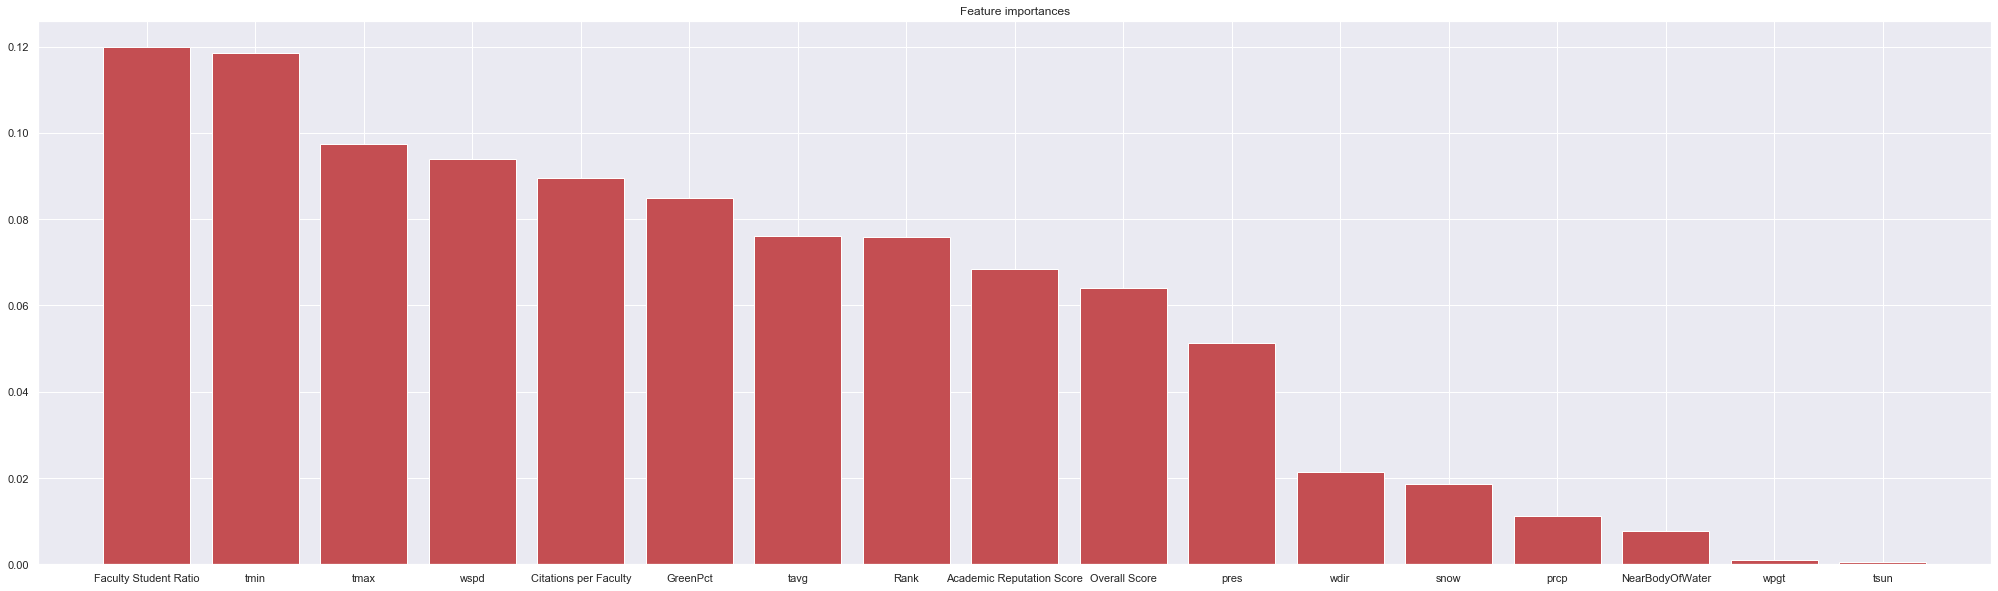

In [181]:
sns.set()
plt.figure(figsize=(35,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), ordered_feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0.5, 1, 'Feature Correlations')

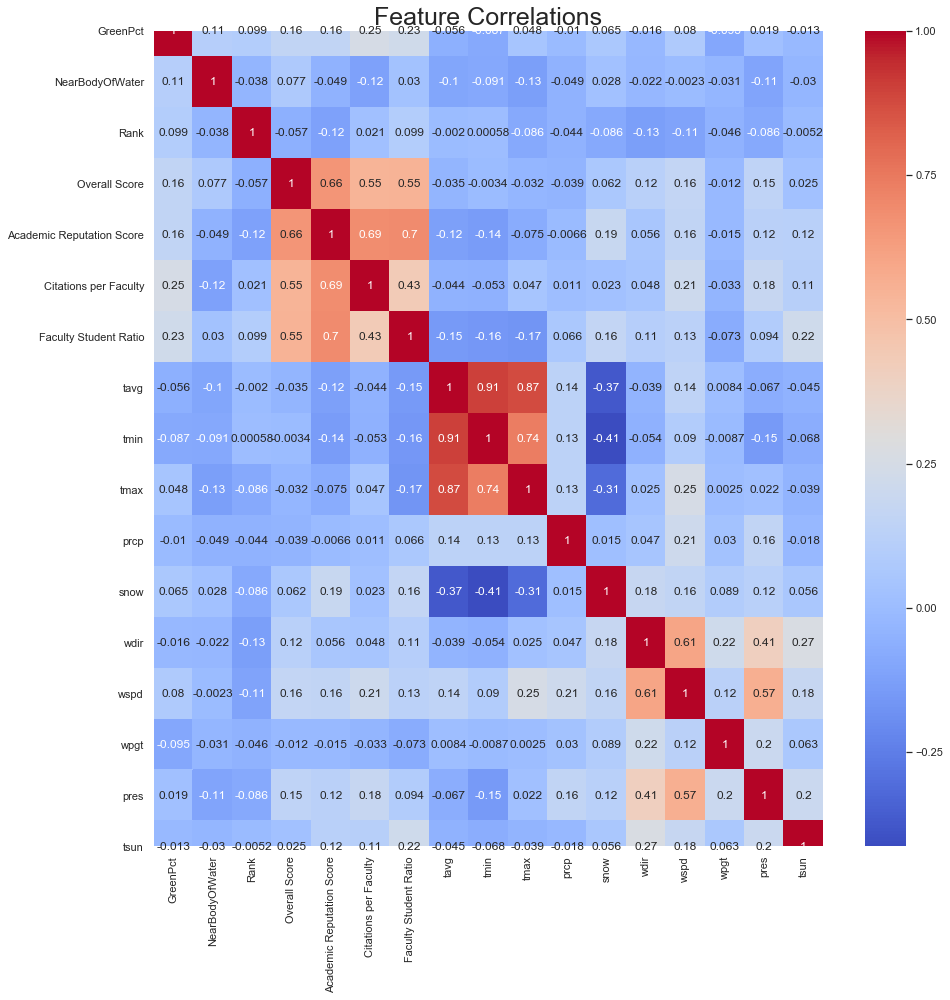

In [187]:
sns.set()
plt.figure(figsize=(15,15))
sns.heatmap(df_train_attribute.corr(), annot=True,  cmap='coolwarm')
plt.title("Feature Correlations", fontsize = 25)

In [182]:
# for jaccard_similarity_score
import numpy as np
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

/Users/Malfoy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.627906976744186

In [185]:
jaccard_similarity_score(y_test, y_pred, normalize=False)

/Users/Malfoy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


54

In [ ]:
#result for jaccard_simmilarity_score

In [ ]:
#jaccard_similarity_score for SVM with rbf :0.6046511627906976
#jaccard_similarity_score for KNN with manhattan and n of 23 :0.627906976744186
#jaccard_similarity_score for  Random Forest: 0.627906976744186